In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

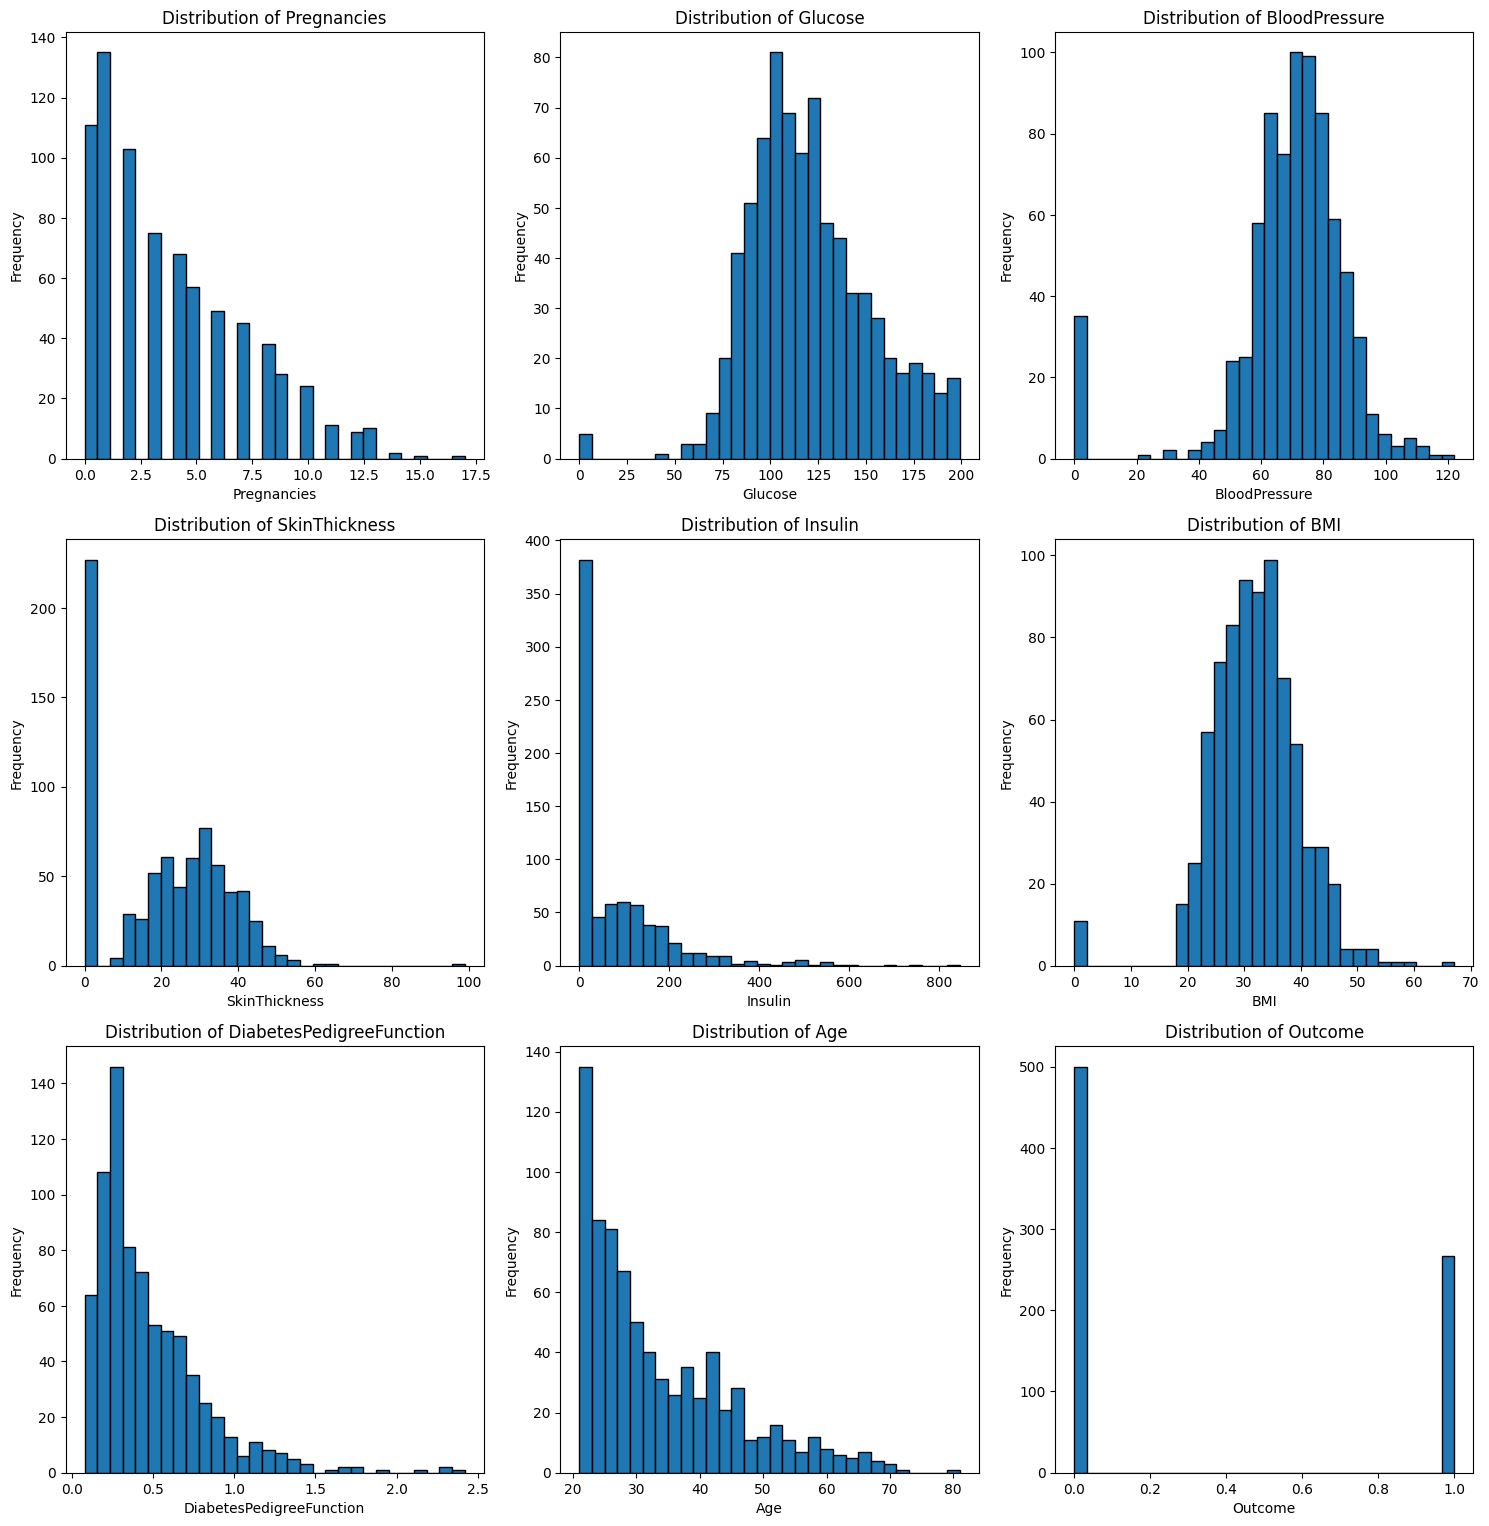

In [ ]:
def plot_feature_distributions():
    num_features = df.shape[1]
    num_rows = (num_features // 3) + 1
    plt.figure(figsize=(15, num_rows * 5))

    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)
        plt.hist(df[column].dropna(), bins=30, edgecolor='k')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
plot_feature_distributions()

Histogram Analysis

In [ ]:
def clean_zeros():
    invalid_conditions = (
        (df['Glucose'] == 0) |
        (df['BloodPressure'] == 0) |
        (df['SkinThickness'] == 0) |
        (df['Insulin'] == 0) |
        (df['BMI'] == 0)
    )

    return df[~invalid_conditions]
df = clean_zeros()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 2 to 764
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


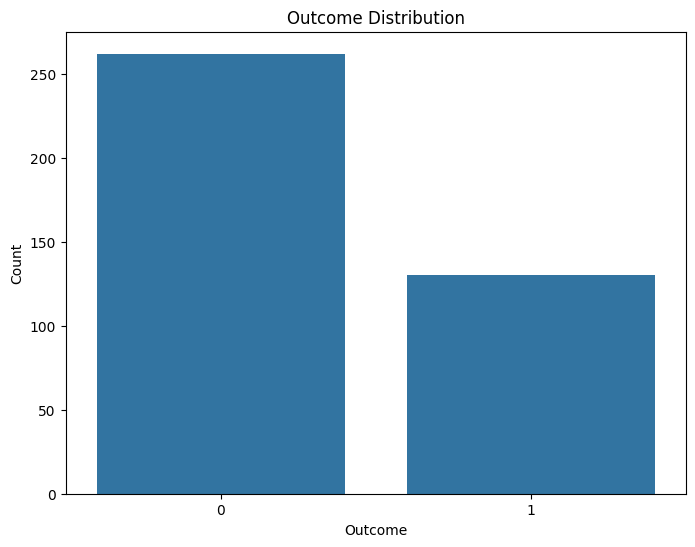

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title(f'Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

balancing the Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['Outcome'])
y = df['Outcome']

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name='Outcome')], axis=1)

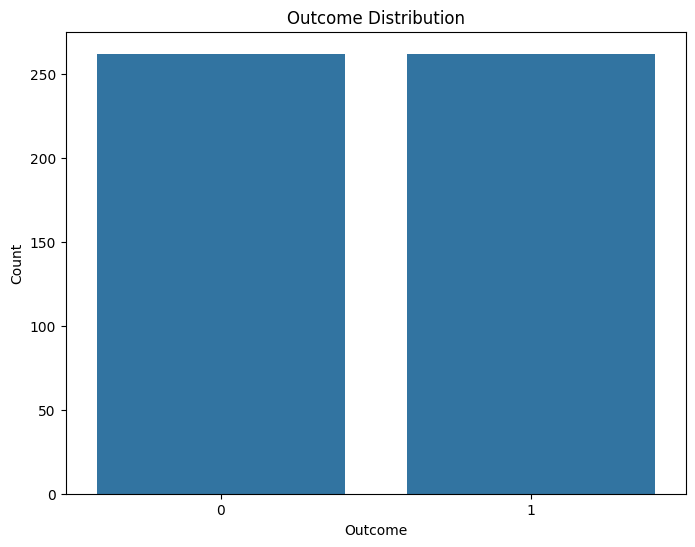

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title(f'Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

<Axes: >

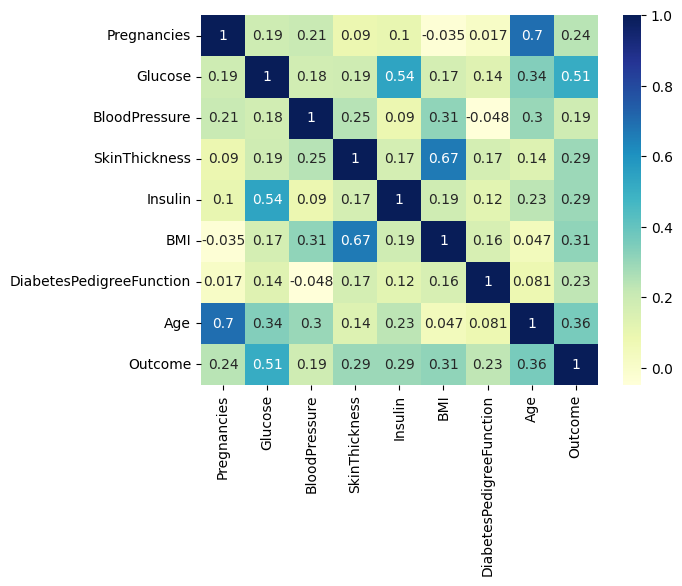

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

Data Augmentation

In [ ]:
def add_gaussian_noise(data, noise_level=0.01, augment_fraction=0.5):
    num_augmented = int(len(data) * augment_fraction)
    noisy_data = data.copy().iloc[:num_augmented]

    for column in noisy_data.select_dtypes(include=[np.number]).columns:
        if column != 'Outcome':  # Do not add noise to the target variable
            noise = np.random.normal(0, noise_level, size=num_augmented)
            noisy_data[column] += noise

    combined_data = pd.concat([data, noisy_data], axis=0).reset_index(drop=True)
    return combined_data
df = add_gaussian_noise(df)


# **Model Training**

train test split

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df.drop(['Outcome'], axis=1), df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
logistic_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
logistic_score = logistic_model.score(X_test, y_test)
print(f'Logistic Regression Accuracy: {logistic_score}')


Logistic Regression Accuracy: 0.8164556962025317


svm

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
svm_score = svm_model.score(X_test, y_test)
print(f'SVM Accuracy: {svm_score}')


SVM Accuracy: 0.7784810126582279


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_score=forest.score(X_test, y_test)
print(f'Random Forest Accuracy: {forest_score}')

Random Forest Accuracy: 0.9177215189873418


Making a Predictive system

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:

input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


saving machine learning model

In [ ]:
import pickle

In [ ]:

filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:

for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
